In [1]:
from data_engineering import *
from porfolio_and_backtesting import *

In [2]:
end = dt(2022, 10, 4)
start = dt(2015, 10, 4)

In [3]:
df = getData(start, end, [], True)
tickers = ["AAPL"]*len(df.columns)

Data was loaded sucessfully!


In [4]:
w = np.array([[1 / (len(df.columns))]*len(df.columns),])

In [5]:
w = w.reshape(-1)

In [6]:
sp500 = Portfolio("S&P500 EW",df,tickers, w, start, end)

In [7]:
sp500.sharpe_ratio_ann

0.7141786998809287

In [8]:
pr = {"APL": [0,1,2,3,3], "HH": [0,1,2,3,4]}
pd.DataFrame(pr, index = ["R","l","F","L","5"])

,APL,HH
R,0,0
l,1,1
F,2,2
L,3,3
5,3,4


In [9]:
sp500.data.index[0]

Timestamp('2015-10-05 00:00:00')

In [10]:
sp500.performance_report()

The performance metrics for the portfolio S&P500 EW are:

                       S&P500 EW
Total Return            1.341440
Expected Return         0.000561
Daily Volatility        0.012468
Annualized Returns      0.141350
Annualized Volatility   0.197919
Sharpe Ratio            0.714179


In [11]:
import seaborn as sb

In [12]:
y = sp500.returns

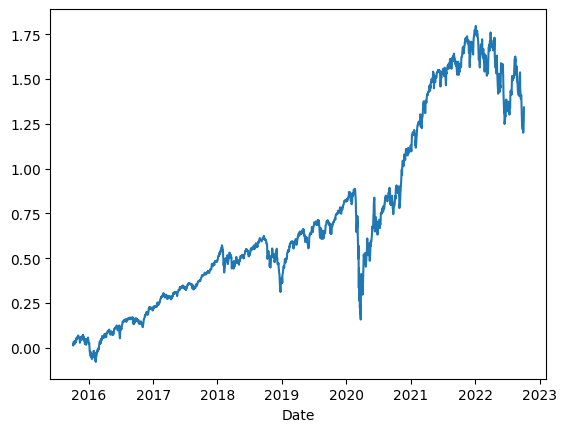

In [13]:
sp500.performance_plot()

In [14]:
sp500.aplha_report()

Getting benchmark data....
Data was imported sucessfully!

The model was calculated as follows:

Alpha: -6.499701857754151e-05
Beta: -6.499701857754151e-05
P-Value Alpha: 0.4113085214522838
P-Value Beta: 0.0
Model R2: 0.9213687777103038


(-6.499701857754151e-05,
 -6.499701857754151e-05,
 0.4113085214522838,
 0.0,
 0.9213687777103038)

In [15]:
mkt_returns = pdr.get_data_yahoo(["SPY"], start, end)["Close"]

In [16]:
mkt_returns.pct_change().dropna(axis = 0)

Symbols,SPY
Date,
2015-10-06,-0.003426
2015-10-07,0.008191
2015-10-08,0.009027
2015-10-09,0.000596
2015-10-12,0.000944
...,...
2022-09-28,0.019676
2022-09-29,-0.020889
2022-09-30,-0.015464


In [17]:
y = pd.DataFrame(sp500.returns, columns = ["SP500"])
X = mkt_returns.pct_change().dropna(axis = 0)

In [18]:
y.index[0] < X.index[0]

True

In [19]:
if y.index[0] == X.index[0]:
    print("No adjustments have to be made.")
else:
    print("Adjustments have to be made.")
    if y.index[0] > X.index[0]:
        X = X.iloc[1:]
    elif y.index[0] < X.index[0]:
        y = y.iloc[1:]

if y.index[0] == X.index[0]:
    print("True")
else:
    print("False")

Adjustments have to be made.
True


In [20]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 2.062e+04
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:27:12   Log-Likelihood:                 7466.5
No. Observations:                1762   AIC:                        -1.493e+04
Df Residuals:                    1760   BIC:                        -1.492e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   8.34e-05      1.308      0.1

In [21]:
est2.rsquared

0.9213687777103038